At Aerofit, I have been tasked with the responsibility of analyzing the provided dataset to extract valuable insights and deliver actionable recommendations. Engaging in the resolution of this specific case study will aid in cultivating expertise in identifying connections between input variables and output variables.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**What does ‘good’ look like?**


**1.Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset**

In [3]:
data=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749')
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
data.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [ ]:
data.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [4]:
# finding the number of rows and columns given in the dataset
data.shape

(180, 9)

In [ ]:
data.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [ ]:
#Checking for the missing values and find the number of missing values in each column
data.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

**2. Detect Outliers**

In [ ]:
#t○ Find the outliers for every continuous variable in the dataset

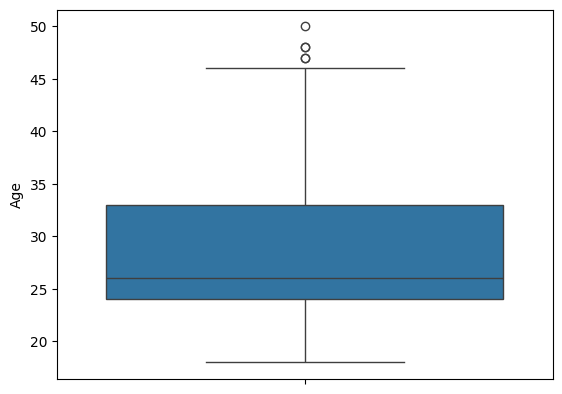

In [ ]:
sns.boxplot(data ,y = 'Age' )
plt.show()

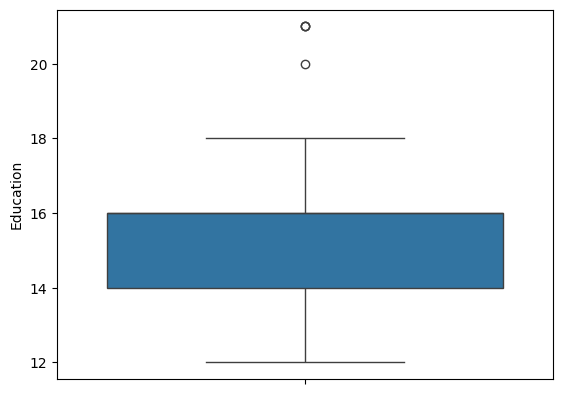

In [ ]:
sns.boxplot(data ,y = 'Education' )
plt.show()

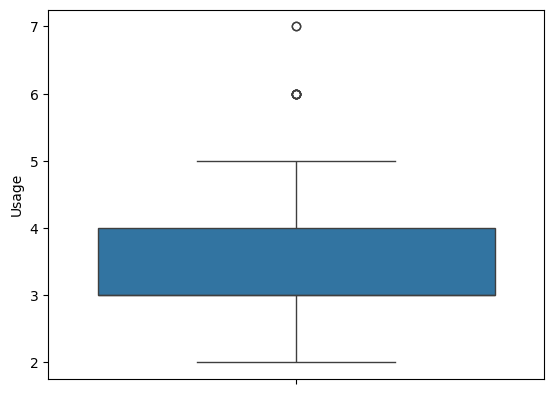

In [ ]:
sns.boxplot(data ,y = 'Usage' )
plt.show()

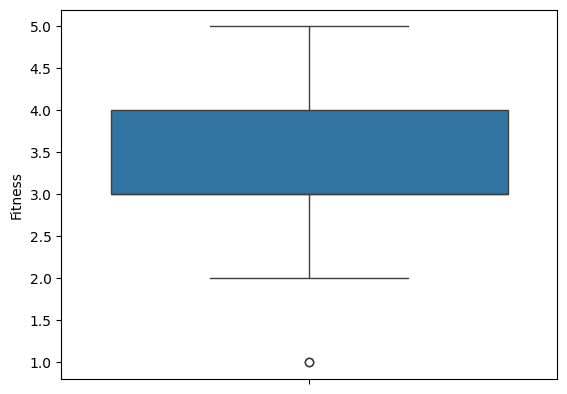

In [ ]:
sns.boxplot(data ,y = 'Fitness' )
plt.show()

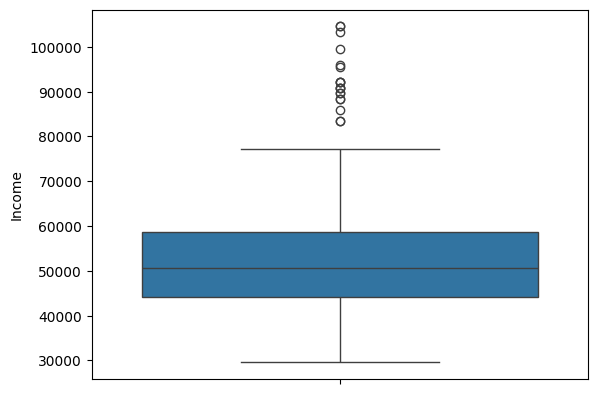

In [ ]:
sns.boxplot(data ,y = 'Income' )
plt.show()

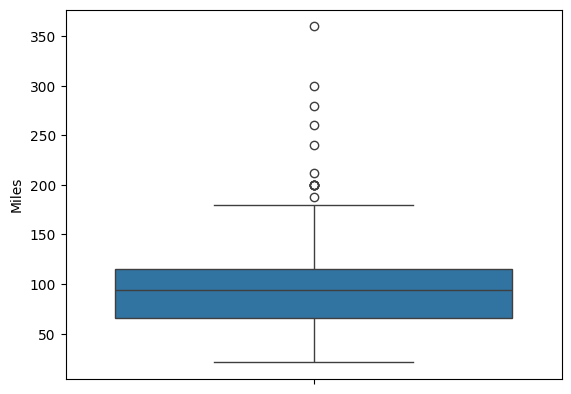

In [ ]:
sns.boxplot(data ,y = 'Miles' )
plt.show()

In this scenario of outlier:

MILES: The majority of outlier are in the miles column, there are 50% people who walk around 65-125 miles. 25% of people walk very less , they cover around 25-75. and There are many outliers, few people cover huge miles .

Age: 75% of customers aged between 20-33 are into fitness and uses the product, Only youth and early 30's are mainly focused according to the data. Few outlier that lies between 60-70. but such old age group people are very less.

Fitness: 50% fitness level in people lies between 3 - 4 levels and 25% lies between 2-3.

Usage : Very few outliers who are majorly into fitness whose usage is high (6-7), but 75% people their usage lies between 2-4 , which is moderate. and 50% lies between 3-4 which is great.

In [ ]:
#Remove/clip the data between the 5 percentile and 95 percentile
numerical_columns = data.select_dtypes(include=['int', 'float']).columns.to_list()
for i in numerical_columns:
  perc5= np.percentile(data[i], 5)
  perc95= np.percentile(data[i], 95)
  data[i] = np.clip(data[i], perc5, perc95)

**3. Check if features like marital status, Gender, and age have any effect on the product purchased**

<ipython-input-25-95b96612e482>:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:violet'` for the same effect.

  sns.countplot(data = data, x = 'Product' , hue = 'MaritalStatus', color = 'violet')


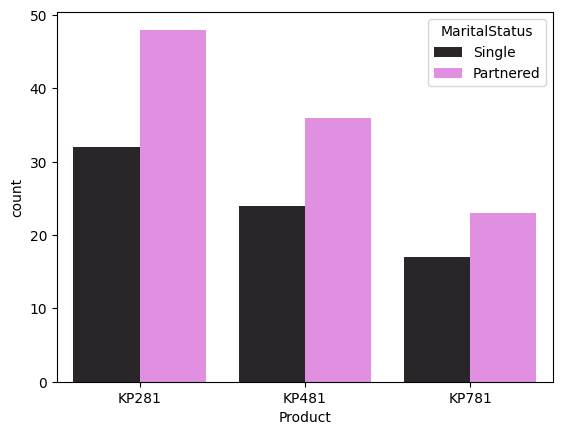

In [ ]:
##Finding if there is any relationship between the categorical variables and the output variable in the data.

sns.countplot(data = data, x = 'Product' , hue = 'MaritalStatus', color = 'violet')
plt.show()

Partners always prefer working together and fitness . So they are more likely to purchase or use the products. We can have offers and discounts for singles so that engage more

<ipython-input-27-665f69bb74db>:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:pink'` for the same effect.

  sns.countplot(data = data, x = 'Product' , hue = 'Gender', color = 'pink')


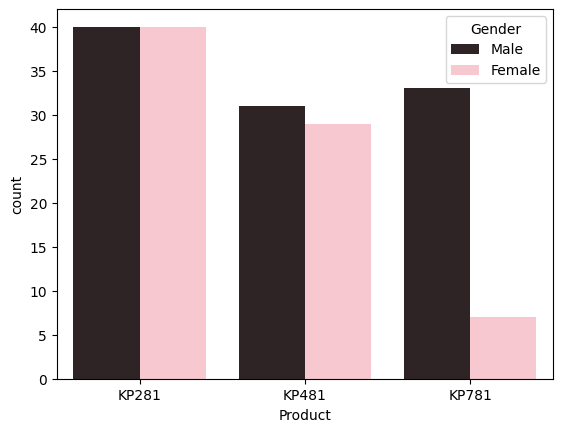

In [ ]:
sns.countplot(data = data, x = 'Product' , hue = 'Gender', color = 'pink')
plt.show()

According to my analysis We should get offers and discounts for single women / women so that they can use or purchase more specifically kp781.It is least likely. Males are moderately okay with every product there is no major difference .

In [ ]:
#Finding if there is any relationship between the continuous variables and the output variable in the data.

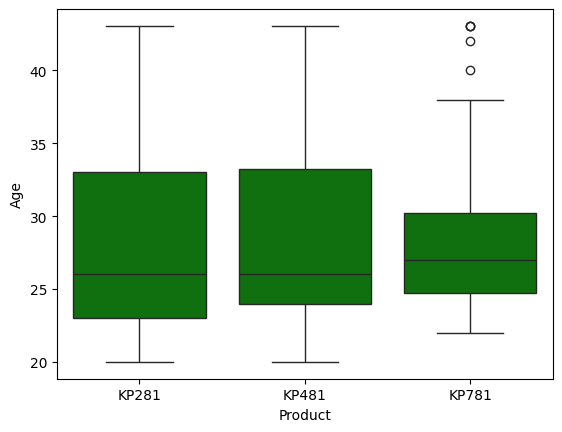

In [ ]:
sns.boxplot( data = data , x = 'Product' , y = data['Age'] , color = 'green')
plt.show()

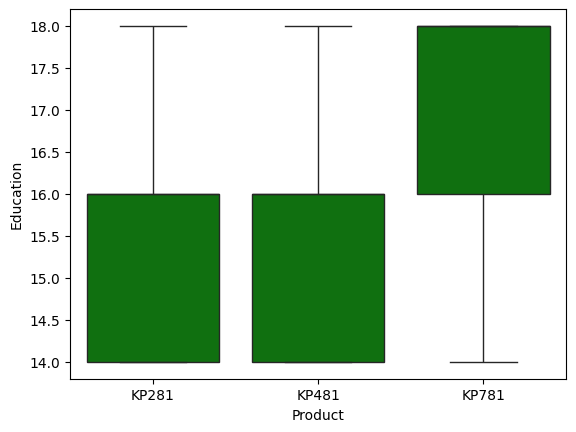

In [ ]:
sns.boxplot( data = data , x = 'Product' , y = data['Education'] , color = 'green')
plt.show()

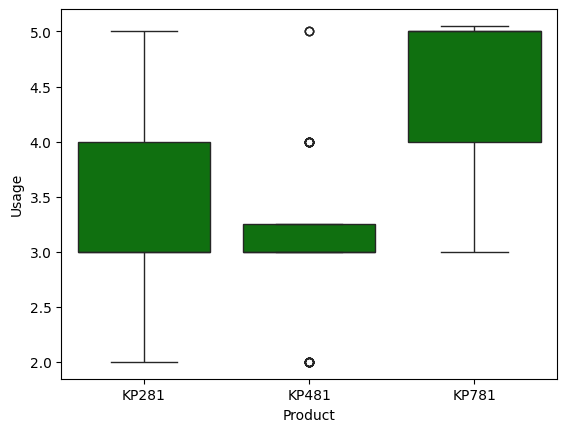

In [ ]:
sns.boxplot( data = data , x = 'Product' , y = data['Usage'] , color = 'green')
plt.show()

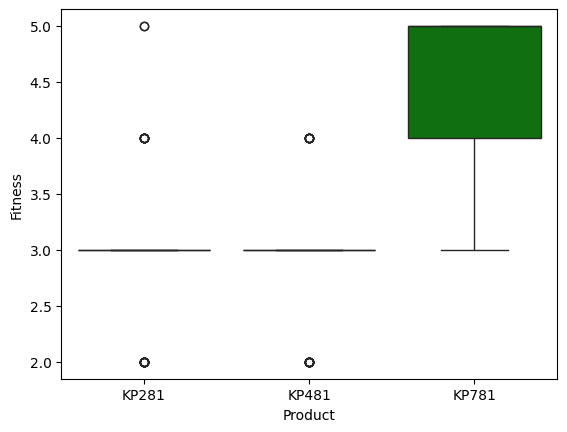

In [ ]:
sns.boxplot( data = data , x = 'Product' , y = data['Fitness'] , color = 'green')
plt.show()

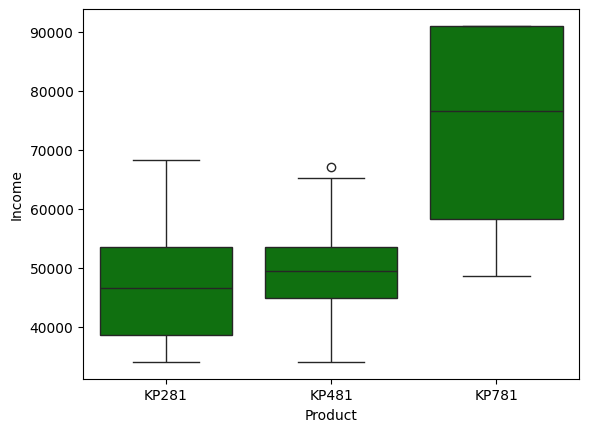

In [ ]:
sns.boxplot( data = data , x = 'Product' , y = data['Income'] , color = 'green')
plt.show()

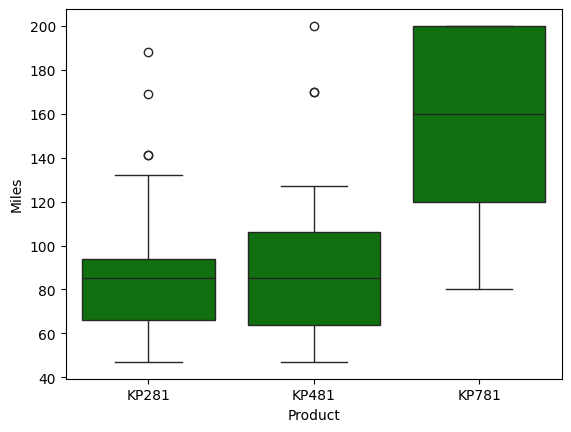

In [ ]:
sns.boxplot( data = data , x = 'Product' , y = data['Miles'] , color = 'green')
plt.show()

**4. Representing the Probability**

In [ ]:
# Finding the marginal probability (what percent of customers have purchased
#KP281, KP481, or KP781)

cross_tab = pd.crosstab(index=data['Product'],columns='count')
marginal_probability = cross_tab / cross_tab.sum()

print("Marginal Probability of Each Product:")
print(marginal_probability)

Marginal Probability of Each Product:
col_0       count
Product          
KP281    0.444444
KP481    0.333333
KP781    0.222222


As the data that is being evaluated is , there are some issues with KP781 whose probablity is very less compared to other and to increase sales and usage we will have to either work for its price / usability or detect problems why it is least likely to be used by people specially females.

In [ ]:
#Finding the probability that the customer buys a product based on each column.
cross_tab1 = pd.crosstab(index=data['Product'],columns=data['MaritalStatus'], normalize ='index')
cross_tab1

MaritalStatus,Partnered,Single
Product,,
KP281,0.600,0.400
KP481,0.600,0.400
KP781,0.575,0.425


Partners has more probability use each product , as the data says all the 3 products has high possibility in couples than in singles.

In [ ]:
cross_tab2 = pd.crosstab(index=data['Product'],columns=data['Gender'], normalize ='index')
cross_tab2


Gender,Female,Male
Product,,
KP281,0.500000,0.500000
KP481,0.483333,0.516667
KP781,0.175000,0.825000


In [ ]:
#Finding the conditional probability that an event occurs given that another event has
#occurred. (Example: given that a customer is female, what is the probability
#she’ll purchase a KP481)

cross_tab3 = pd.crosstab(index=data['Gender'],columns=data['Product'], normalize ='index')
cross_tab3

Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308


Females and males are more likely to use KP281 , but females are very less likely to use or purchase KP781 but if we look at males they like KP281 more but also almost similar to use KP481 AND KP781

In [ ]:
cross_tab4 = pd.crosstab(index=data['MaritalStatus'],columns=data['Product'], normalize ='index')
cross_tab4

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.448598,0.336449,0.214953
Single,0.438356,0.328767,0.232877


Very slight difference between single and couples for the particular product kp281,They all like KP281. Th least liked product between singles and couples are KP781. no major differences between couple and single preferences.

**5. Check the correlation among different factors**

In [ ]:
# Find the correlation between the given features in the table.

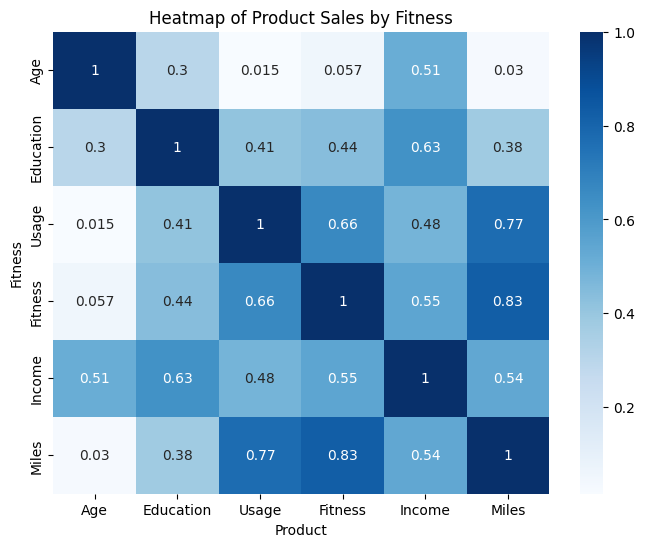

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(numeric_only=True), cmap='Blues', annot=True)
plt.title('Heatmap of Product Sales by Fitness')
plt.xlabel('Product')
plt.ylabel('Fitness')
plt.show()

Co-relation between variables:

1)Miles and fitness = highly co-related because the more miles a person walks more fitter they get.

2)Usage and miles = Highly co-realted as More they walk and cover large miles , more usage of product is there.

3)Fitness and Usage = Moderately co -related with each other, More usage of product will lead to good level of fitness.

4)income and fitness = Moderately co -relative the more people earn or generate income, they invest more in fitness and better food.

**6. Customer profiling and recommendation**

In [ ]:
#Make customer profilings for each and every product.
kp281 = data[data['Product'] == 'KP281']

kp281[['Gender','MaritalStatus']].value_counts()

Gender  MaritalStatus
Female  Partnered        27
Male    Partnered        21
        Single           19
Female  Single           13
Name: count, dtype: int64

In [ ]:
kp481 = data[data['Product'] == 'KP481']

kp481[['Gender','MaritalStatus']].value_counts()

Gender  MaritalStatus
Male    Partnered        21
Female  Partnered        15
        Single           14
Male    Single           10
Name: count, dtype: int64

In [ ]:
kp781 = data[data['Product'] == 'KP781']
kp781[['Gender','MaritalStatus']].value_counts()

Gender  MaritalStatus
Male    Partnered        19
        Single           14
Female  Partnered         4
        Single            3
Name: count, dtype: int64

Analysis:

Product 'KP281' is mostly preferred by 'couples' and if we specifically look at the gender then it mostly 'Female'. Couples are more into using this product!

Product 'KP481' is majorly preferred by 'couples' again but if we specifically look at the gender then it mostly 'male'. Male gender prefers this product more and single males least like it.

Product 'kp781' is already on the low side if we look at preference of people. in general it is preffered less than the other two produtcs . Females are least likely to use this product.

In [ ]:
#Write a detailed recommendation from the analysis that you have done.

Based on the analysis conducted for this case study, the following recommendations can be made:

**Customer Profiling**: Create detailed customer profiles for each AeroFit treadmill product (KP281, KP481, KP781) based on characteristics such as age, gender, education, marital status, usage, income, fitness level, and miles expected to walk/run each week. Use descriptive analytics techniques to develop appropriate tables and charts to visualize these profiles.

**Identify Target Audience**: Analyze the customer profiles to identify the characteristics of the target audience for each treadmill product. Look for patterns and trends in customer demographics and behavior that differentiate the customers interested in each product.

**Tailored Marketing Strategies**: Use the insights from customer profiling to tailor marketing strategies for each AeroFit treadmill product. Develop targeted advertising campaigns, promotional offers, and product messaging that resonate with the identified target audience for each product.

**Product Development**: Utilize the findings to inform product development decisions. Identify features and functionalities that are most appealing to the target audience for each treadmill product and consider incorporating these insights into future product iterations.

**Sales and Customer Service**: Train sales and customer service teams to understand the characteristics of the target audience for each treadmill product. Equip them with the knowledge to effectively communicate the benefits of each product to potential customers and provide personalized recommendations based on customer profiles.

**Continuous Monitoring and Optimization**: Regularly monitor customer behavior and feedback to evaluate the effectiveness of marketing strategies and product offerings. Continuously optimize targeting and messaging based on new insights and changing customer preferences.

Overall, by leveraging the insights gained from customer profiling and analysis, AeroFit can enhance its marketing effectiveness, improve product positioning, and better meet the needs of its diverse customer base, ultimately driving business growth and customer satisfaction

